<a href="https://colab.research.google.com/github/Prajwal-Nagaraj/Masters/blob/ML-Project/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prajwal Nagaraja | C21097301 

Importing all the required Libraries.

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

###Data Exploration
Printing out the first 10 rows of the dataset to check for consistency.

In [ ]:
test = pd.read_csv('/content/Coursework_1_data.csv')
test.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


Checking the number of rows and columns of a dataset using the .shape method.

In [ ]:
test.shape

(12330, 18)

Checking the various characteristics of the dataset such as mean, std deviation and IQR of each column of the dataset using the .describe() method

In [ ]:
test.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
test.dtypes

Administrative             float64
Administrative_Duration    float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
Month                       object
Region                       int64
TrafficType                  int64
VisitorType                 object
Revenue                       bool
dtype: object

In [ ]:
test['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

From the above method, we can see that only 1908 entries have True in their 'Revenue' column out of 12330 rows i.e, only ~15% of the users actually purchased something from the website. This makes this dataset imbalanced so we have to be carefull during evaluating the performance of the model.

Before we move onto either removing or modifying our data set, we first check the correlation of every variable with our target variable 'Revenue' using a correlation heatmap as shown below.

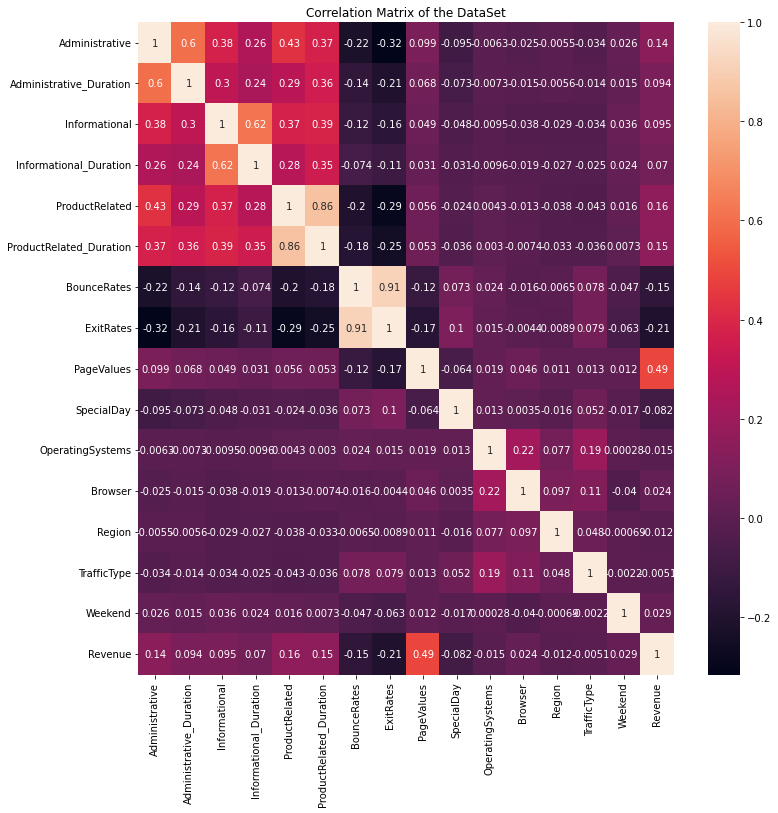

In [ ]:
coor_matrix = test.corr()
fig, ax = plt.subplots(figsize =(12,12))
sns.heatmap(coor_matrix, annot=True)
plt.title('Correlation Matrix of the DataSet')
plt.show()

From the heatmap we can see that the Target Variable has significant positive correlation with only a few of the attributes, so we visualise these attributes of the dataset using charts and graphs.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37bedd3f90>,
      dtype=object)

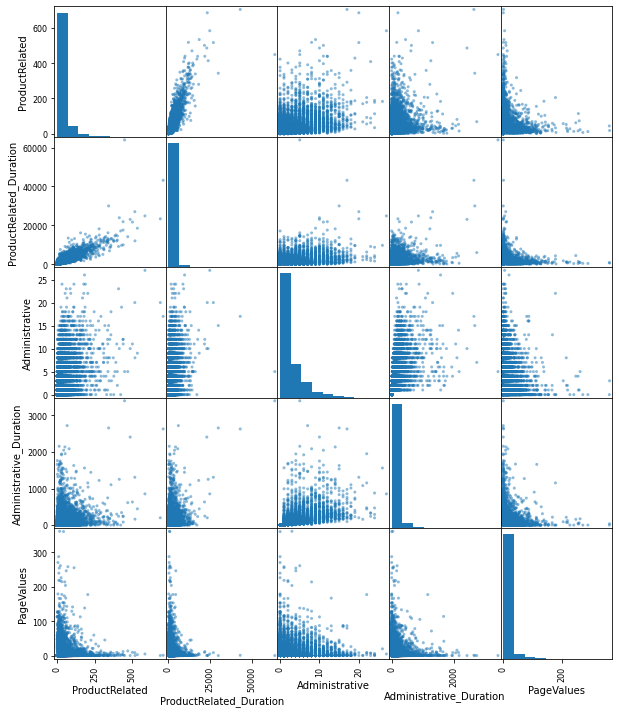

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(test[['ProductRelated', 'ProductRelated_Duration','Administrative','Administrative_Duration', 'PageValues']],figsize = (10,12))

####Scatter Plot
To check if there's any linear relation between the variables

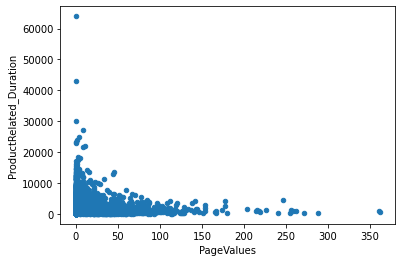

In [ ]:
test.plot(kind = 'scatter', x='PageValues', y='ProductRelated_Duration')

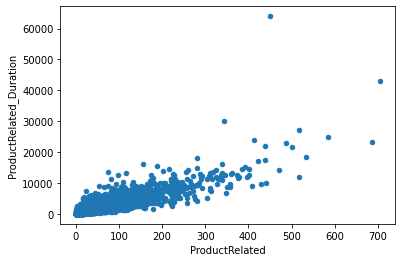

In [ ]:
test.plot(kind = 'scatter', x= 'ProductRelated', y = 'ProductRelated_Duration')

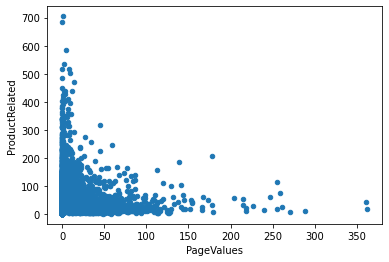

In [ ]:
test.plot(kind = 'scatter', x='PageValues', y='ProductRelated')

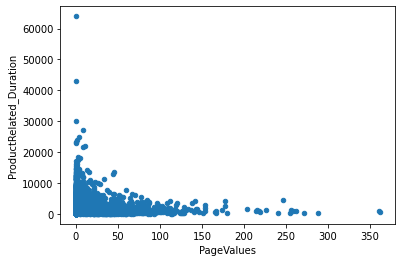

In [ ]:
test.plot(kind = 'scatter', x='PageValues', y='ProductRelated_Duration')

####Box Plot
To check for the mean and the Inter Quartile Range of the attributes.

       ProductRelated_Duration
count             12330.000000
mean               1194.746220
std                1913.669288
min                   0.000000
25%                 184.137500
50%                 598.936905
75%                1464.157213
max               63973.522230


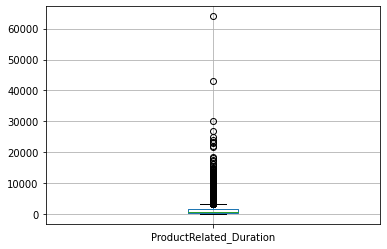

In [ ]:
print(test[['ProductRelated_Duration']].describe())
test[['ProductRelated_Duration']].boxplot()

As seen from the boxplot and the scatter plot there are outliers in the dataset. One particular datapoint is really abnormal which is the highest time spent by a user on a product which is 63973 seconds which is equivalent to 17 hours which is clearly not possibble. So we drop this entry completely.

In [ ]:
y=test['ProductRelated_Duration'].idxmax(axis = 0)
test = test.drop([test.index[y]])

In [ ]:
test.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000
mean,2.314948,80.549495,0.503123,34.268415,31.697623,1189.654260,0.022193,0.043074,5.889736,0.061432,2.124017,2.357125,3.147538,4.069754
std,3.321831,174.242172,1.269243,138.920448,44.318239,1828.307501,0.048490,0.048598,18.569114,0.198925,0.911361,1.717343,2.401611,4.025289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.100000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.873809,0.003114,0.025152,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.125000,0.000000,0.000000,38.000000,1464.000000,0.016825,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,2720.500000,24.000000,2256.916667,705.000000,43171.233380,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


       ProductRelated
count    12329.000000
mean        31.697623
std         44.318239
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000


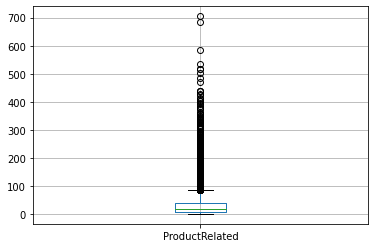

In [ ]:
print(test[['ProductRelated']].describe())
test[['ProductRelated']].boxplot()

         PageValues
count  12329.000000
mean       5.889736
std       18.569114
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      361.763742


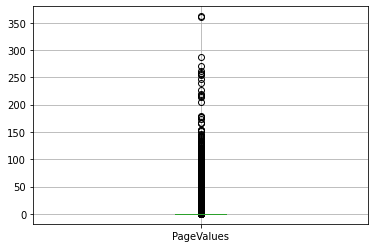

In [ ]:
print(test[['PageValues']].describe())
test[['PageValues']].boxplot()

####Histograms
To check frequency distribution of the attributes

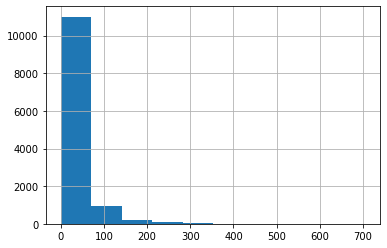

In [ ]:
test['ProductRelated'].hist()

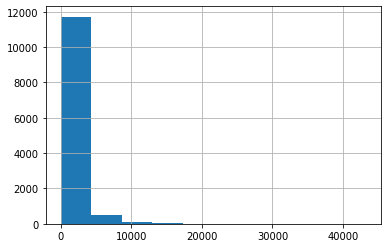

In [ ]:
test['ProductRelated_Duration'].hist()

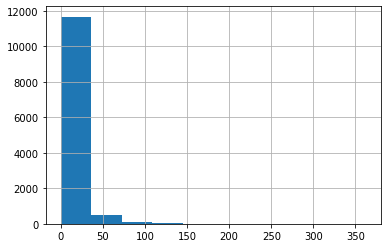

In [ ]:
test['PageValues'].hist()

In [ ]:
test.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

The .isna() method is returning 0 so we replace the 0's in the dataset with NaN and then check how many entries has 0 in it.

In [ ]:
test.replace(0, np.nan, inplace = True)

In [ ]:
test.isna().sum()

Administrative              5768
Administrative_Duration     5903
Informational               9699
Informational_Duration      9925
ProductRelated                38
ProductRelated_Duration      755
BounceRates                 5518
ExitRates                     76
PageValues                  9599
SpecialDay                 11078
Month                          0
OperatingSystems               0
Browser                        0
Region                         0
TrafficType                    0
VisitorType                    0
Weekend                        0
Revenue                        0
dtype: int64

Now that the .isna() method is returning the zero entry variables,we
deal with the empty variables below.

###Data Pre Processing

Since there are many entries as 0 in the dataset, we use pre-processing techniques to make it suitable to achieve good performance for building models.

####Dealing with zero entries values
Since SpecialDay, Weekend, Informational and Informational_Duration has majority of their entries as 0 and the correlation of these attributes' with the taget variable 'Revenue' is quite low and even negative in some instance. So we remove these attributes entirely from the dataset.


In [ ]:
test.drop(['SpecialDay', 'Weekend', 'Informational', 'Informational_Duration'], axis = 1, inplace=True)
test.isna().sum()

Administrative             5768
Administrative_Duration    5903
ProductRelated               38
ProductRelated_Duration     755
BounceRates                5518
ExitRates                    76
PageValues                 9599
Month                         0
OperatingSystems              0
Browser                       0
Region                        0
TrafficType                   0
VisitorType                   0
Revenue                       0
dtype: int64

Since we're trying to figure out if a visitor is going to buy something from the website the Operating System and the Browser columns seem redundant. We're assuming that the website works on any computer irrespective of the operating system or the type of browser that a visitor is going to use. So I'm gonna drop these two categorical columns and continue data exploration.

In [ ]:
test.drop(['OperatingSystems', 'Browser'], axis = 1, inplace= True)
test.head(10)

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Region,TrafficType,VisitorType,Revenue
0,NaN,NaN,1.0,NaN,0.200000,0.200000,NaN,Feb,1,1,Returning_Visitor,False
1,NaN,NaN,2.0,64.000000,NaN,0.100000,NaN,Feb,1,2,Returning_Visitor,False
2,NaN,NaN,1.0,NaN,0.200000,0.200000,NaN,Feb,9,3,Returning_Visitor,False
3,NaN,NaN,2.0,2.666667,0.050000,0.140000,NaN,Feb,2,4,Returning_Visitor,False
4,NaN,NaN,10.0,627.500000,0.020000,0.050000,NaN,Feb,1,4,Returning_Visitor,False
5,NaN,NaN,19.0,154.216667,0.015789,0.024561,NaN,Feb,1,3,Returning_Visitor,False
6,NaN,NaN,1.0,NaN,0.200000,0.200000,NaN,Feb,3,3,Returning_Visitor,False
7,1.0,NaN,NaN,NaN,0.200000,0.200000,NaN,Feb,1,5,Returning_Visitor,False
8,NaN,NaN,2.0,37.000000,NaN,0.100000,NaN,Feb,2,3,Returning_Visitor,False
9,NaN,NaN,3.0,738.000000,NaN,0.022222,NaN,Feb,1,2,Returning_Visitor,False


In [ ]:
test.isna().sum()

Administrative             5768
Administrative_Duration    5903
ProductRelated               38
ProductRelated_Duration     755
BounceRates                5518
ExitRates                    76
PageValues                 9599
Month                         0
Region                        0
TrafficType                   0
VisitorType                   0
Revenue                       0
dtype: int64

Since ProductRelated_Duration and ProductRelated have only a few of their entries as zero, we replace the 0 entries with the mean and the median of the respective values which will make it easier to model.

In [ ]:
meanpr = test['ProductRelated'].mean()
medianprd = test['ProductRelated_Duration'].median()
test['ProductRelated'].fillna(meanpr, inplace = True)
test['ProductRelated_Duration'].fillna(medianprd, inplace = True)
print('After filling zero entries for ProductRelated and ProductRelated_Duration in the Dataset\n',test.isna().sum())

After filling zero entries for ProductRelated and ProductRelated_Duration in the Dataset
 Administrative             5768
Administrative_Duration    5903
ProductRelated                0
ProductRelated_Duration       0
BounceRates                5518
ExitRates                    76
PageValues                 9599
Month                         0
Region                        0
TrafficType                   0
VisitorType                   0
Revenue                       0
dtype: int64


Because PageValues has the highest correlation with the target variable, We are not going to change it in any way.

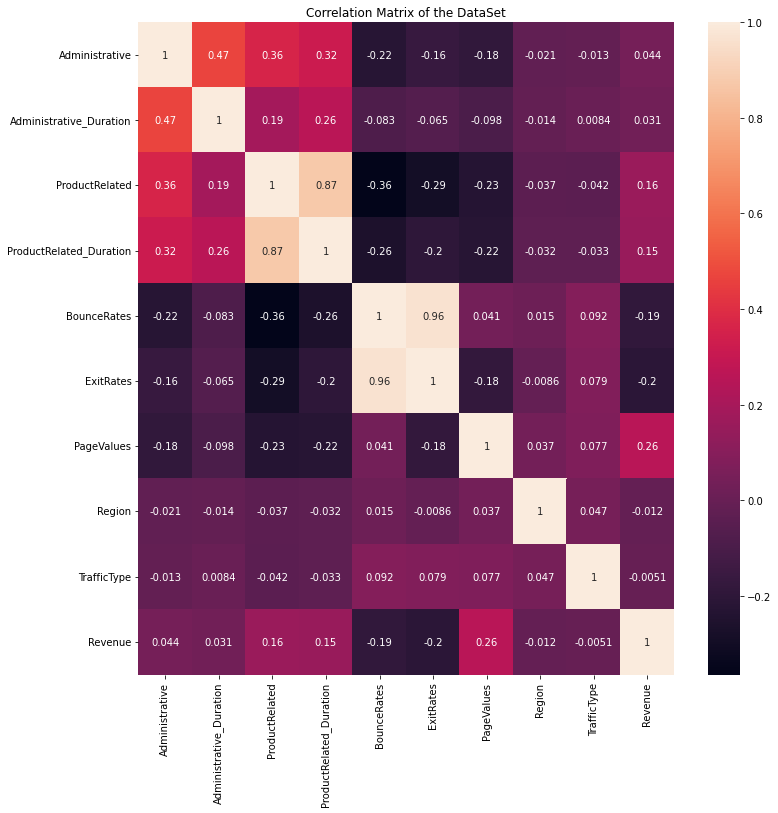

In [ ]:
coor_matrix = test.corr()
fig, ax = plt.subplots(figsize =(12,12))
sns.heatmap(coor_matrix, annot=True)
plt.title('Correlation Matrix of the DataSet')
plt.show()

Now that the required preprocessiong is complete, we replace the NaN's in the dataset with 0's to get it back to the original form.

In [ ]:
test.fillna(0, inplace = True)

####One Hot Encoder

As some of the attributes and the target value is categorical, we use encoders to convert it to numerical value.

As seen below, there are 3 unique values for VisitorType and 2 Unique values for Revenue. So we use OneHotEncoder to convert these features to numerical values.

In [ ]:
test.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [ ]:
test.Revenue.unique()

array([False,  True])

In [ ]:
test.head(10)

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Region,TrafficType,VisitorType,Revenue
0,0.0,0.0,1.000000,671.587500,0.200000,0.200000,0.0,Feb,1,1,Returning_Visitor,False
1,0.0,0.0,2.000000,64.000000,0.000000,0.100000,0.0,Feb,1,2,Returning_Visitor,False
2,0.0,0.0,1.000000,671.587500,0.200000,0.200000,0.0,Feb,9,3,Returning_Visitor,False
3,0.0,0.0,2.000000,2.666667,0.050000,0.140000,0.0,Feb,2,4,Returning_Visitor,False
4,0.0,0.0,10.000000,627.500000,0.020000,0.050000,0.0,Feb,1,4,Returning_Visitor,False
5,0.0,0.0,19.000000,154.216667,0.015789,0.024561,0.0,Feb,1,3,Returning_Visitor,False
6,0.0,0.0,1.000000,671.587500,0.200000,0.200000,0.0,Feb,3,3,Returning_Visitor,False
7,1.0,0.0,31.795623,671.587500,0.200000,0.200000,0.0,Feb,1,5,Returning_Visitor,False
8,0.0,0.0,2.000000,37.000000,0.000000,0.100000,0.0,Feb,2,3,Returning_Visitor,False
9,0.0,0.0,3.000000,738.000000,0.000000,0.022222,0.0,Feb,1,2,Returning_Visitor,False


Use OneHotEncoder from the Sklearn library to encode the categorical features such as 'Revenue' and 'VisitorType'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop = 'first', sparse= False)
enc1 = OneHotEncoder(sparse = False, handle_unknown='ignore')
test1 = test[['Revenue']]
enc.fit(test1)
test2 = pd.DataFrame(enc.transform(test1), columns = enc.get_feature_names(['Revenue']))

testm = test[['VisitorType']]
enc1.fit(testm)
test3 = pd.DataFrame(enc1.transform(testm), columns = enc1.get_feature_names(['VisitorType']))



test3 = pd.concat([test2,test3, test[['Administrative','Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates','Region', 'TrafficType','PageValues']]], axis = 1)
test3.rename({'Revenue_True':'Revenue','VisitorType_Other':'Other', 'VisitorType_Returning_Visitor':'Returning_Visitor','VisitorType_New_Visitor':'New_Visitor'}, axis = 1, inplace =True)
test3.dropna(inplace = True)
test3.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Revenue,New_Visitor,Other,Returning_Visitor,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Region,TrafficType,PageValues
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,671.587500,0.20,0.20,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,2.0,64.000000,0.00,0.10,1.0,2.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,671.587500,0.20,0.20,9.0,3.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.666667,0.05,0.14,2.0,4.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,10.0,627.500000,0.02,0.05,1.0,4.0,0.0


In [ ]:
test3.describe()

,Revenue,New_Visitor,Other,Returning_Visitor,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Region,TrafficType,PageValues
count,12328.00000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000
mean,0.15477,0.137330,0.006895,0.855775,2.315136,80.556028,31.797959,1230.878868,0.022195,0.043072,3.147713,4.069922,5.890213
std,0.36170,0.344209,0.082752,0.351332,3.321900,174.247729,44.284213,1808.569921,0.048491,0.048600,2.401630,4.025409,18.569791
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,262.979167,0.000000,0.014286,1.000000,2.000000,0.000000
50%,0.00000,0.000000,0.000000,1.000000,1.000000,7.500000,18.000000,671.587500,0.003119,0.025146,3.000000,2.000000,0.000000
75%,0.00000,0.000000,0.000000,1.000000,4.000000,93.168750,38.000000,1464.052404,0.016830,0.050000,4.000000,4.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,27.000000,2720.500000,705.000000,43171.233380,0.200000,0.200000,9.000000,20.000000,361.763742


####Feature Scaling
We do feature Scaling to improve the Machine Learning Performance and speed.
In feature Scaling we use MinMaxScaler with range (0,10) to make sure that the prominence of the outliers is not lost and scale ProductRelated_Duration and Administrative_Duration and the MinMaxScaler again but this time with range (0,1) to scale the ProductRelated, PageValues and the Administrative_Duration column. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler1 = MinMaxScaler(feature_range=(0,10))
test3['ProductRelated'] = scaler.fit_transform(test3[['ProductRelated']])
test3['ProductRelated_Duration'] = scaler1.fit_transform(test3[['ProductRelated_Duration']])
test3['PageValues'] = scaler.fit_transform(test3[['PageValues']])
test3['Administrative'] = scaler.fit_transform(test3[['Administrative']])
test3['Administrative_Duration'] = scaler1.fit_transform(test3[['Administrative_Duration']])
test3.head()

,Revenue,New_Visitor,Other,Returning_Visitor,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Region,TrafficType,PageValues
0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.155450,0.20,0.20,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.001420,0.014709,0.00,0.10,1.0,2.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.155450,0.20,0.20,9.0,3.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.001420,0.000502,0.05,0.14,2.0,4.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.012784,0.145237,0.02,0.05,1.0,4.0,0.0


In [ ]:
test3.describe()

,Revenue,New_Visitor,Other,Returning_Visitor,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Region,TrafficType,PageValues
count,12328.00000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000
mean,0.15477,0.137330,0.006895,0.855775,0.085746,0.296107,0.043747,0.285003,0.022195,0.043072,3.147713,4.069922,0.016282
std,0.36170,0.344209,0.082752,0.351332,0.123033,0.640499,0.062904,0.418934,0.048491,0.048600,2.401630,4.025409,0.051331
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.008523,0.060800,0.000000,0.014286,1.000000,2.000000,0.000000
50%,0.00000,0.000000,0.000000,1.000000,0.037037,0.027568,0.024148,0.155450,0.003119,0.025146,3.000000,2.000000,0.000000
75%,0.00000,0.000000,0.000000,1.000000,0.148148,0.342469,0.052557,0.339015,0.016830,0.050000,4.000000,4.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,10.000000,0.200000,0.200000,9.000000,20.000000,1.000000


###Model Implementation
Now that we've completed Data Exploration and Data Preprocessing, we move onto building various models and implementing them. And since our target value is categorical, We use classifiers to model data. First we split the dataset into training and testing datasets using the train_test_split function and then continue with the modelling. As seen from the correlation heatmap, the PageValues, ProductRealted_Duration and the ProductRelated have the highest correlation with the target variable Revenue. Along with these 3 attributes, the Target variable Revenue also has positive correlation with Administrative and AdministrativeDuration columns. So we fit first split all these variables into training and testing datasets and then go onto model fitting and predicting.

In [ ]:
from sklearn.model_selection import train_test_split
X1 = test3.iloc[:, [4,5,6,7,12]].values
y1 = test3.iloc[:,[0]].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.25, random_state =69)

####Logistic Regression


ALthough it has regression in its name, in its basic form Logistic regression is used to model linear data and for our data we use Logistic regression model to classify the target data 'Revenue' according to the various attributes in the dataset such as 'ProductRelated_Duration', 'PageValues', 'ProductRelated', 'Administrative', 'Administrative_Duration' to predict the purchasing intention of the user.

In [ ]:
from sklearn.linear_model import LogisticRegression
log1 = LogisticRegression(solver = 'sag', random_state = 23)
log1.fit(X_train1,y_train1.ravel())

LogisticRegression(random_state=23, solver='sag')

In [ ]:
from sklearn.metrics import accuracy_score
pred = log1.predict(X_test1)
print(accuracy_score(y_test1, pred))

0.844905905256327


####Support Vector Machines 
Since the output class is binary, we use support vector machines with hyperparameter optimisation using gridsearch to classify the dataset. And since PageValues has the highest correlation with the target variable, we use this columns to predict the target variable because including the other variables will increase the processing time drastically and will consume atleast 4 hours to complete the processing.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
X2 = test3.iloc[:, [6,7,12]].values
y2 = test3.iloc[:, [0]].values

parameters = {'kernel':('linear','rbf'),'gamma':[1,5,7],'C':[0.001,0.1,10]}
model = SVC(kernel = "rbf")
cv = RepeatedStratifiedKFold(n_splits = 7, n_repeats= 5, random_state = 4)
search = GridSearchCV(model, parameters, scoring = 'accuracy', n_jobs=-1, cv=cv)
result = search.fit(X2, y2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('Best Score :%s' % result.best_score_)
print('Best Hyperparameters : %s' % result.best_params_)

Best Score :0.8606423594949102
Best Hyperparameters : {'C': 10, 'gamma': 7, 'kernel': 'rbf'}


#### Decision Trees

For the last classifier, we use decision trees which uses tree like struvture to classify the dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 10, random_state = 35)
tree_clf.fit(X_train1, y_train1.ravel())
predi = tree_clf.predict(X_test1)
print(accuracy_score(y_test1, predi))


0.844905905256327


[Text(165.35128435352905, 207.55636363636364, 'X[4] <= 0.01\ngini = 0.262\nsamples = 9246\nvalue = [7810, 1436]'),
 Text(100.90659743910057, 187.7890909090909, 'X[4] <= 0.0\ngini = 0.156\nsamples = 7444\nvalue = [6808, 636]'),
 Text(77.68782011242973, 168.0218181818182, 'X[3] <= 0.913\ngini = 0.148\nsamples = 7213\nvalue = [6632, 581]'),
 Text(54.65855715178014, 148.25454545454545, 'X[3] <= 0.174\ngini = 0.144\nsamples = 6959\nvalue = [6416, 543]'),
 Text(32.361211742660835, 128.48727272727274, 'X[2] <= 0.006\ngini = 0.134\nsamples = 4717\nvalue = [4377, 340]'),
 Text(15.579387882573391, 108.72, 'X[1] <= 0.035\ngini = 0.157\nsamples = 1696\nvalue = [1550, 146]'),
 Text(8.155652717051842, 88.95272727272729, 'X[3] <= 0.004\ngini = 0.143\nsamples = 1403\nvalue = [1294, 109]'),
 Text(5.437101811367895, 69.18545454545455, 'X[1] <= 0.015\ngini = 0.081\nsamples = 141\nvalue = [135, 6]'),
 Text(3.3459088069956278, 49.418181818181836, 'X[3] <= 0.002\ngini = 0.071\nsamples = 136\nvalue = [131, 5

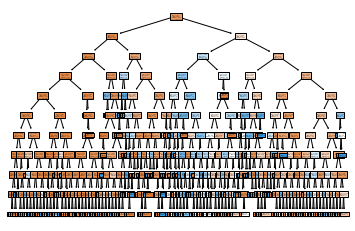

In [ ]:
from sklearn.tree import plot_tree
plot_tree(tree_clf, filled = True)

We use Bagging Ensemble Decision Tree Classifier with 1000 bootstrapped samples and each tree trained with 500 trees to model the dataset which will lead to reduction in variance and to increase the accuracy.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

bag = BaggingClassifier(
    DecisionTreeClassifier(random_state = 2), n_estimators = 500,
    max_samples = 1000, bootstrap=True, random_state = 69)
bag.fit(X_train1, y_train1.ravel())
y_preddt = bag.predict(X_test1)

In [ ]:
print(accuracy_score(y_test1, y_preddt))

0.8627514600908501


###Result analysis and Discussion

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

#Accuracy, precision and recall score of Logisitic Regression Model
LRA = (accuracy_score(y_test1, pred))
LRF1 = (metrics.f1_score(y_test1, pred, average='weighted', labels=np.unique(pred)))
print("The accuracy of the Logistic Regression model is :{} and the f1 score of the Logistic Regression Model is :{}".format(LRA, LRF1))

#Accuracy, precision and recall score of Decision Tree Model
DTA = ((accuracy_score(y_test1, y_preddt)))
DTF1 = (metrics.f1_score(y_test1, y_preddt, average='weighted', labels=np.unique(y_preddt)))
print("The accuracy of the Decision Tree model is :{} and the f1 score of the Decision Tree Model is :{}".format(DTA, DTF1))

The accuracy of the Logistic Regression model is :0.844905905256327 and the f1 score of the Logistic Regression Model is :0.7869827450112964
The accuracy of the Decision Tree model is :0.8627514600908501 and the f1 score of the Decision Tree Model is :0.8390262292781888


So far for every model in our notebook, we're only checking the accuracy of the models. But accuracy is not the only metric that can be used to check the performance of a model. In the results section above we also use F1 score with the average attribute set to weighted this is because the dataset we're using is imbalanced and setting the average attribute to weighted gives us the importance of the samples that are 'True' i.e, the samples that generated Revenue to the site, so a good f1 score implies a good model performance. And from this we can conclude that the model has good performance and is able to predict ~80% of the data correctly.